<a href="https://colab.research.google.com/github/alexlopespereira/mba_enap/blob/main/Exercicios/Aula7_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 7 - Exercícios - Pandas Parte 3 (Merge e Join)

### Documentação do Autograder [Link](https://github.com/alexlopespereira/mba_enap/blob/main/Exercicios/Autograder.ipynb)


*   Link para o gabarito das questões
*   Imports padrão
*   Instalação
*   Autenticaçao para nota
*   Validação




In [1]:
!pip install --upgrade ipynb_autograde > /dev/null

In [ ]:
%env  COURSE=mba_enap
from ipynb_autograde.main import init_log, validate
init_log()
email_result=!gcloud config get-value account
if not email_result or 'unset' in email_result[0]:
  !gcloud auth login

In [ ]:
# Importe a biblioteca pandas
import pandas as pd

### 7.1 Faça um prompt para criar uma função python que integre os dados de PIB de 2017 (Exercício 6.7) e da população de 2017 disponibilizado no link abaixo (não é a do exercício 6.3). Como sugestão, faça um único prompt para carregar os dois arquivos e já integra-los.

#### Entradas: ```https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx``` e ```https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx```

#### Resultado esperado:

Um dataframe exatamente igual a esse

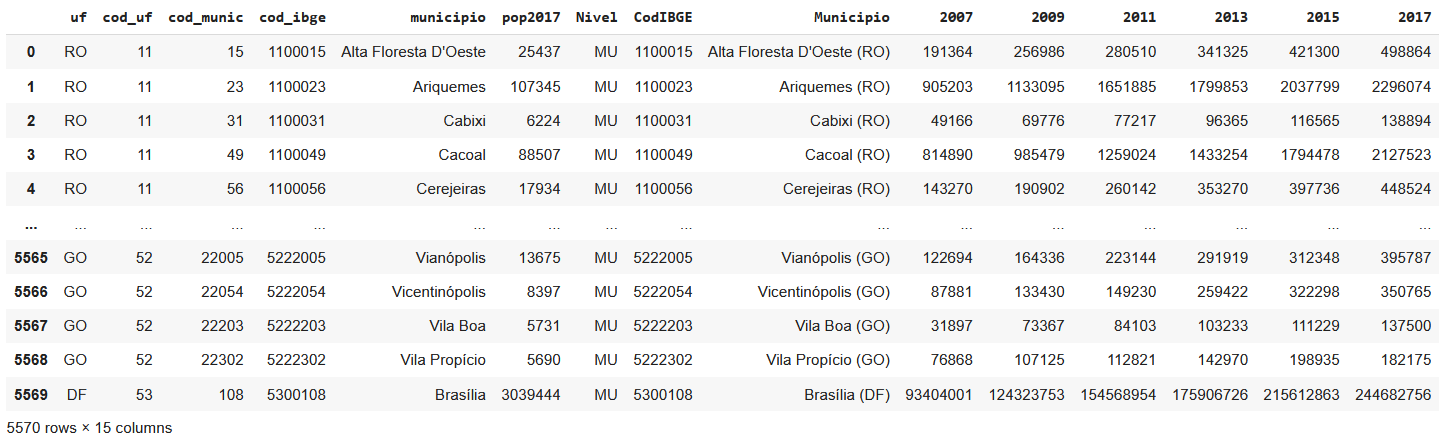


In [ ]:
prompt71 = """AQUI"""

In [ ]:
validate(prompt71, "A7-E1")

### 7.2 Crie um prompt de uma função para calcular o PIB percapita de 2017 de cada município do Brasil. No seu prompt solicite que as colunas de 2007 a 2011 sejam carregadas como string, e as colunas de 2013 a 2017 sejam carregadas como float64.

#### Entradas: ```https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx``` e ```https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx```

#### Resultado esperado:

Um dataframe exatamente igual a esse

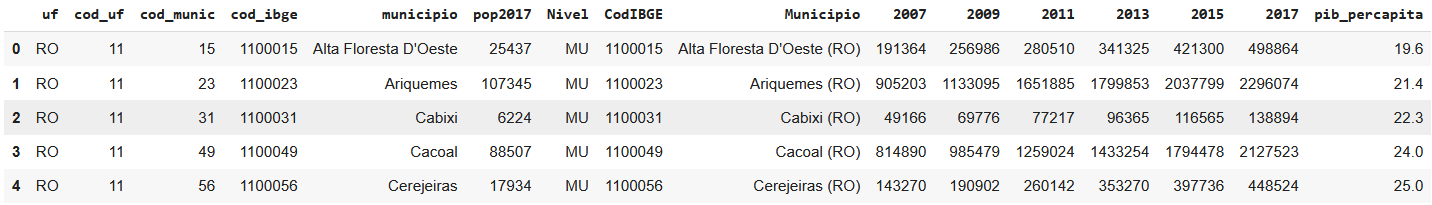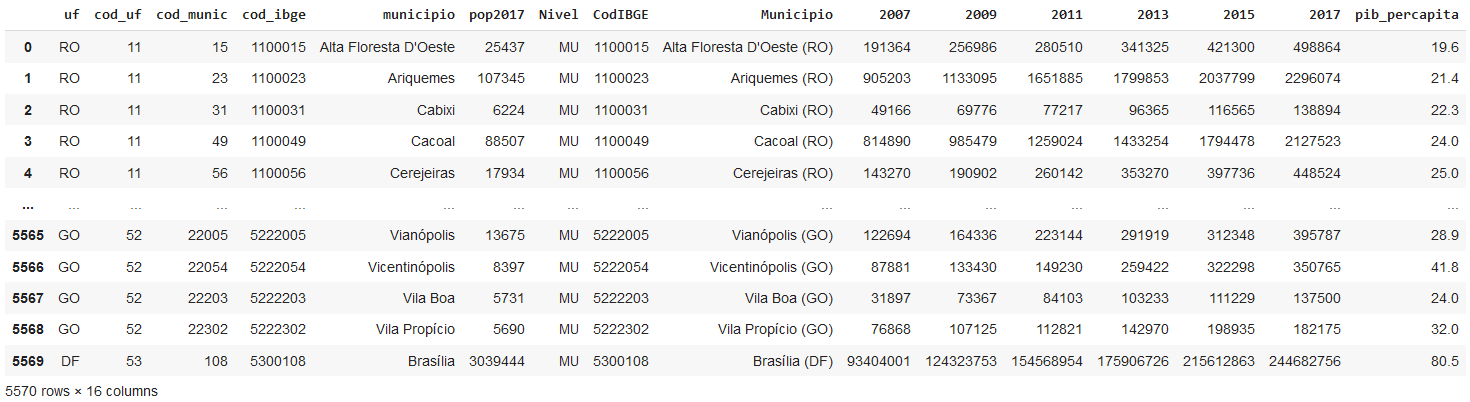

#### Curiosidade: depois de resolver este exercício, peça o seguinte para o a IA do Google Colab: "plote um boxplot interativo, com tooltips nos outliers, do pib_percapita do dataframe df_merged", analise o resultado e comente com o professor.

In [ ]:
prompt72="""AQUI"""

In [ ]:
validate(prompt72, "A7-E2")

### 7.3 Incremente o prompt do exercício anterior, adicionando uma instrução para que ele retorne os top 10 registros de maior PIB percapita

#### Entradas: ```https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx``` e ```'https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx'```

#### Resultado esperado:

Um dataframe exatamente igual a esse

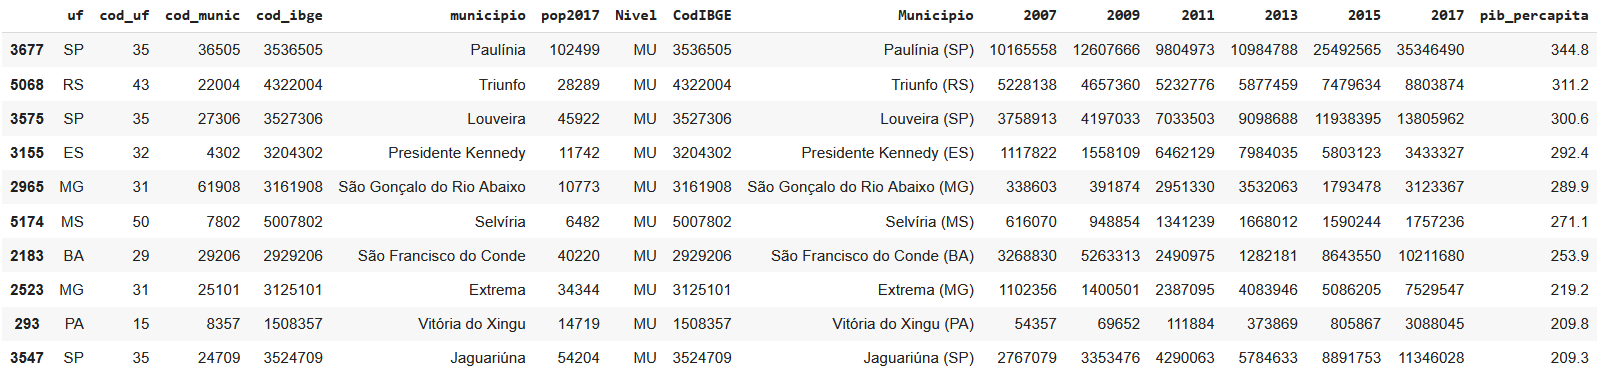

In [ ]:
prompt73 = """AQUI"""

In [ ]:
validate(prompt73, "A7-E3")

### 7.4 Escreva um prompt de uma função para fazer o merge do dataset de morbidade (exercício 6.6) consolidado com o dataset de população de 2017 da URL a seguir.

#### Entradas: ```https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/morbidade/consolidado/morbidade.csv``` e ```https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx```

#### Resultado esperado:

Um dataframe exatamente igual a esse

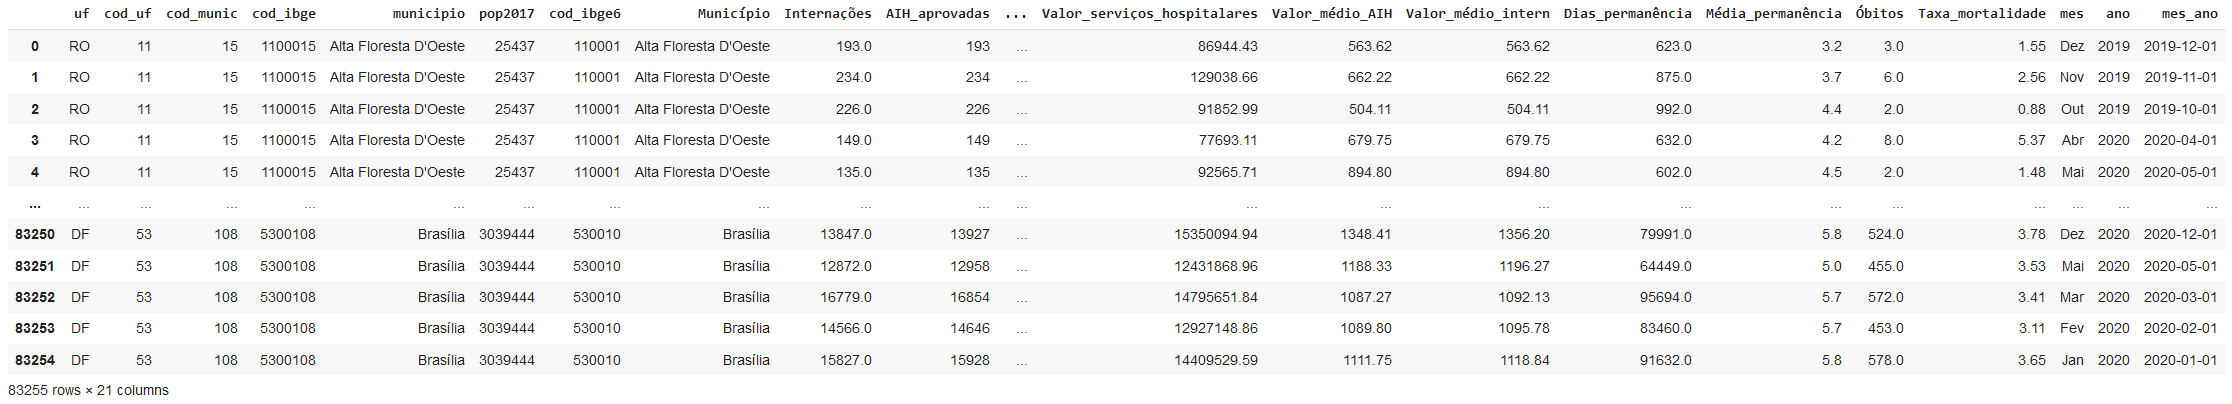

In [5]:
prompt74="""AQUI"""

In [ ]:
validate(prompt74, "A7-E4")

### 7.5 Complementando o exercício anterior, escreva um prompt para retornar os 10 municípios com a maior morbidade para cada mil habitantes no mês de Dezembro de 2020. Ignore por um momento que os dois dados são de anos distintos e não tome o resultado como exato reflexo da realidade.

#### Entradas: ```https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/morbidade/consolidado/morbidade.csv``` e ```https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx```

#### Resultado esperado:

Um dataframe exatamente igual a esse

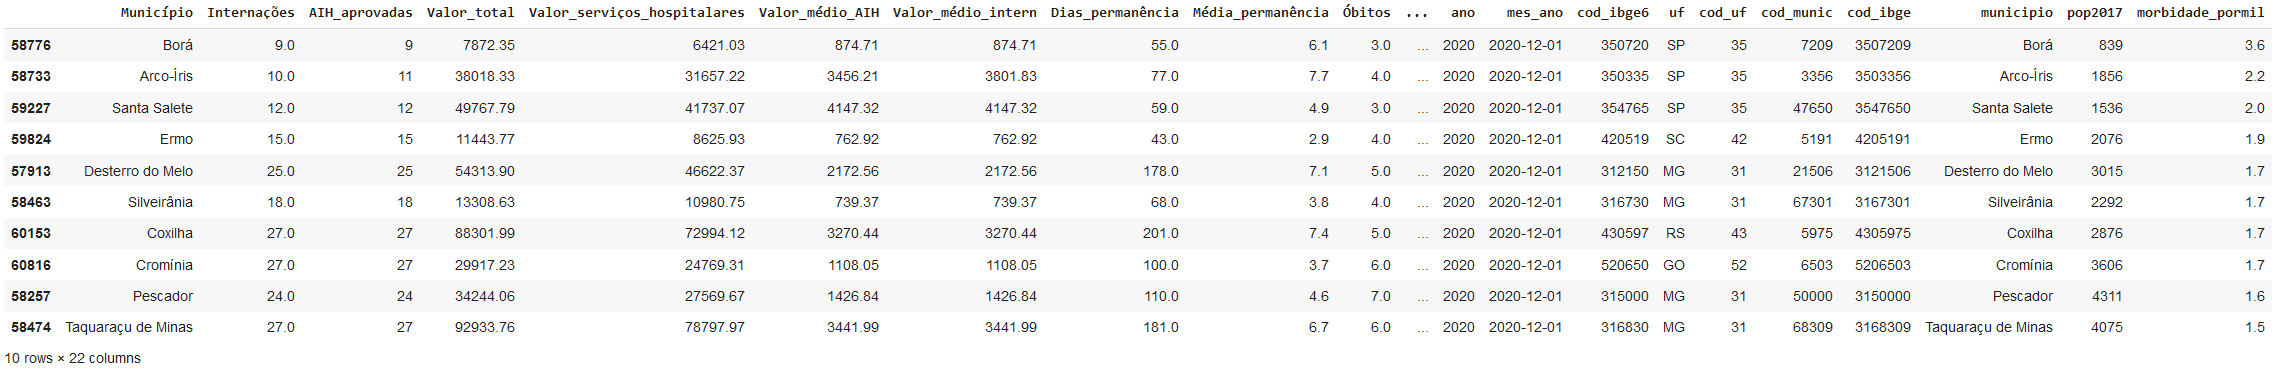

In [17]:
prompt75="""AQUI"""

In [ ]:
validate(prompt75, "A7-E5")

### 7.6 Crie um prompt para integrar os datasets do PIB de 2017, da População de 2017 e do índice de gini, disponibilizados a seguir.

#### Entradas: ```https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx```, ```https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx``` e ```https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/gini/ginibr.csv```

#### Resultado esperado:

Um dataframe exatamente igual a esse

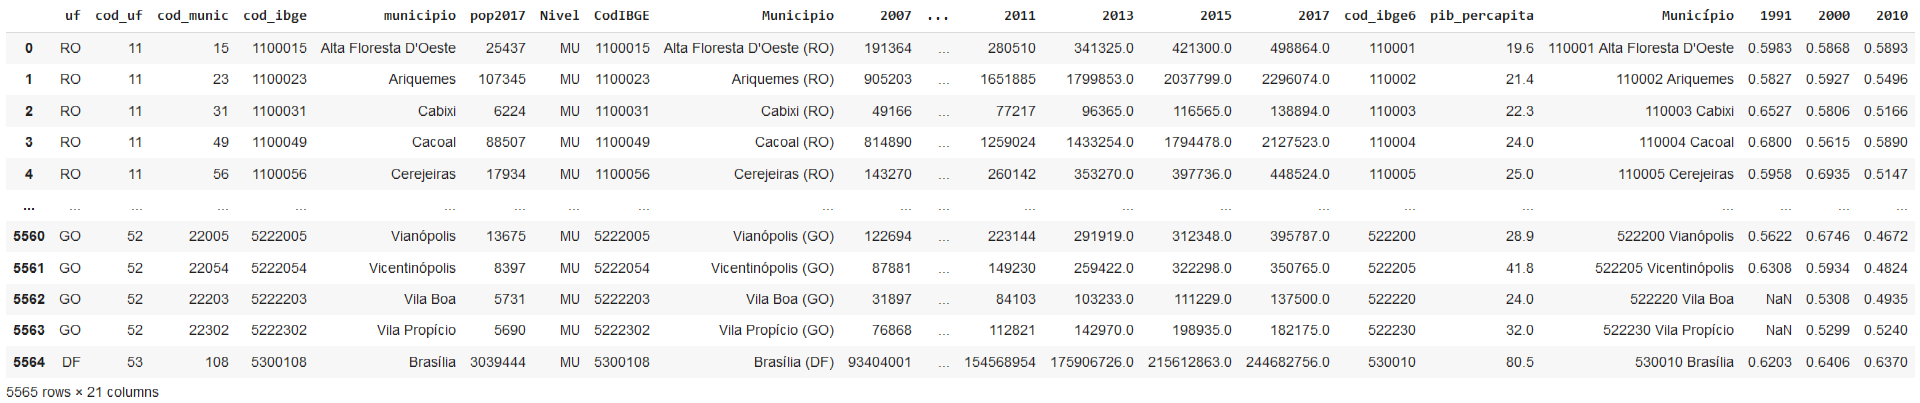

#### Dica: Use como identificador dos registros o código do IBGE. Preste atenção na quantidade de caractéres do código de cada dataset e no seu format (texto ou número). Faça sempre merge com chaves compatíveis (mesmo tipo).



In [21]:
prompt76="""AQUI"""

In [ ]:
validate(prompt76, "A7-E6")

### 7.7 Complemente o exercício anterior com um prompt que carregue todos esses dados e retorna os 10 municípios com os maiores PIBs per capita e os 10 municípios com piores índices de gini, num único dataframe resultante.

#### Entradas: ```https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx```, ```https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx``` e ```https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/gini/ginibr.csv```

#### Resultado esperado:

Um dataframe exatamente igual a esse

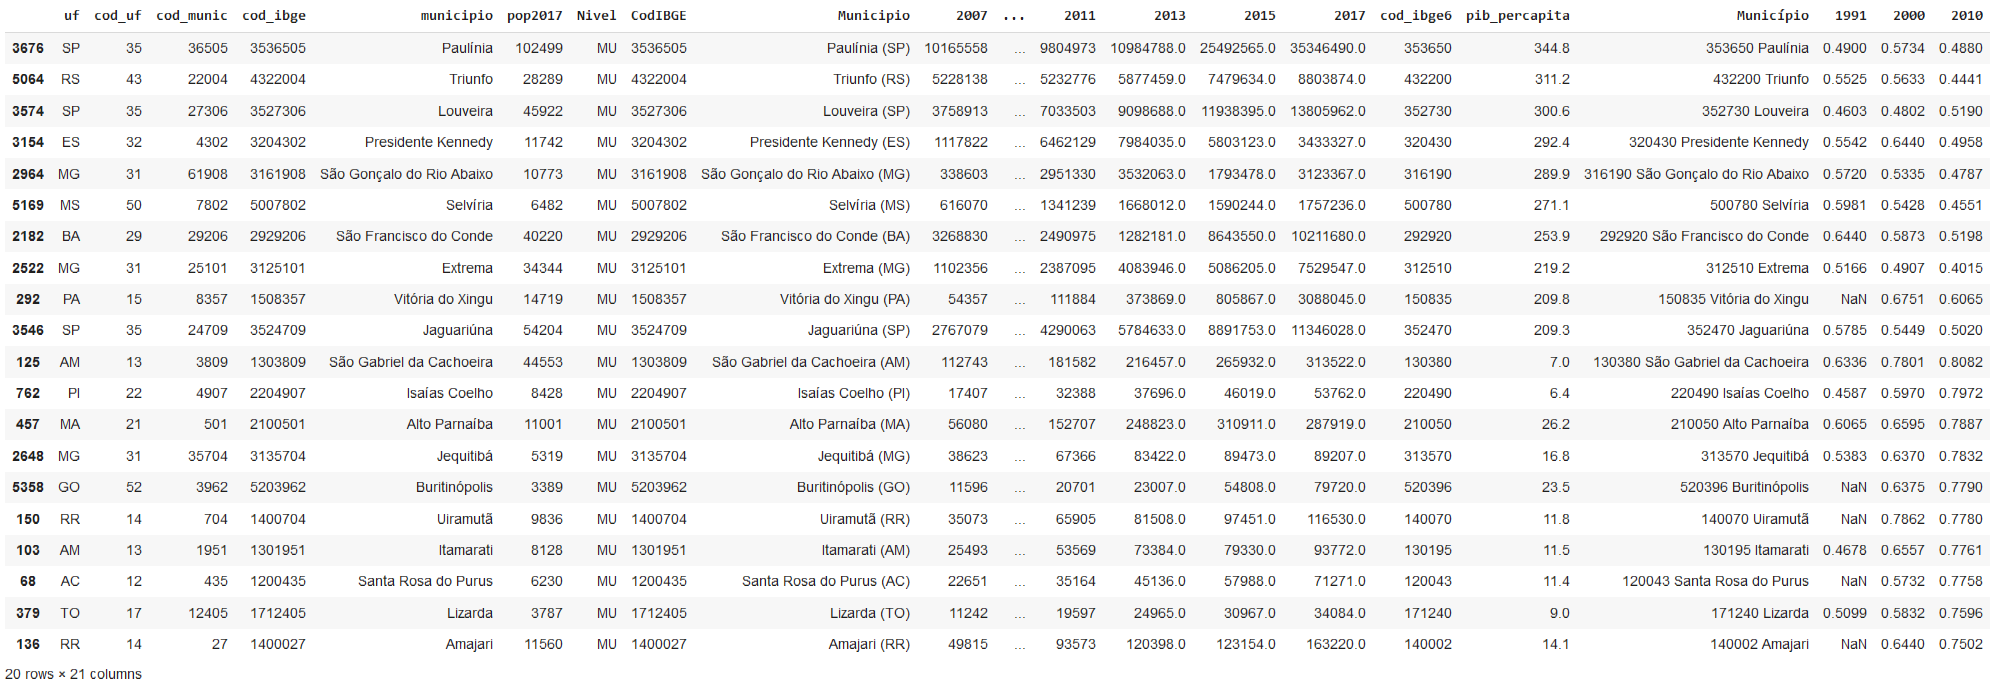

#### Curiosidade: Os municípios com maior PIB per capita são aqueles com melhor índice de gini? Comente com o professor e colegas os resultados à luz de exemplos concretos do seu resultado deste exercício.

In [23]:
prompt77="""AQUI"""

In [ ]:
validate(prompt77, "A7-E7")

### 7.8 Usando funções numpy (com ou sem prompt de IA), crie uma imagem igual a imagem a seguir. Sua função deve receber dois argumentos, o tamanho dos tiles (azulejos) e a quantidade de vezes que esses tiles serão repetidos (justapostos lado a lado) em cada uma das dimensões. Retorne um objeto Image da biblioteca PIL.
#### Entrada:
```tile_size=9``` e ```rep=3```

#### Saída:

```
[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
     [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
     [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
     [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
     [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
     [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
     [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
     [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
     [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
     [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
     [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
     [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
     [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
     [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
     [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
     [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
     ]
```
### Obs.: por curisoidade para facilitar seu trabalho veja como fica esta lista quando transformada num numpy array e exibida como imagem:
     
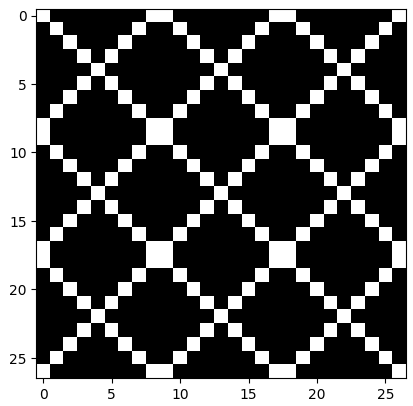


In [37]:
prompt78 = """AQUI"""

In [ ]:
validate(prompt78, "A7-E8")

### Exercício de Reflexão (Facultativo)
#### Você aprendeu alguma coisa que pode ser reaproveitado em outros problemas?
#### Como você pode melhorar seu processo de elaboração de requisitos / prompts?
#### Você notou ambiguidade na sua especificação inicial?

In [ ]:
resposta="""AQUI"""

In [ ]:
validate(resposta, "A7-R1")